In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

# power transformer

In [33]:
df=pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [34]:
x=df.drop(columns=["Strength"])
y=df["Strength"]

- now we will split the data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape

(824, 8)

In [37]:
x_test.shape

(206, 8)

- now we will apply linear regression without transform 

In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.6369606518338298

In [24]:
# now we will perform cross validation score

In [25]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,cv=10,scoring="r2"))

np.float64(0.27820729160873814)

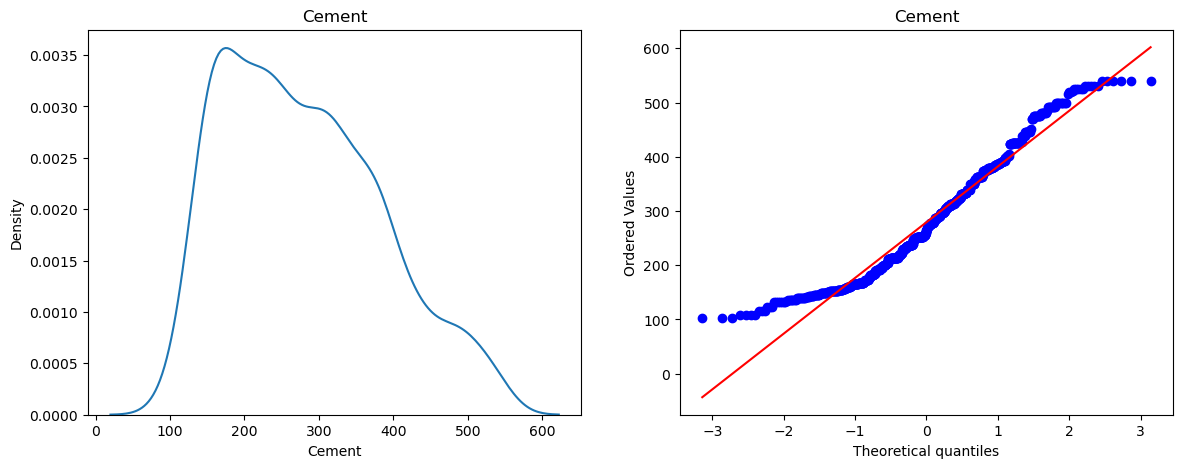

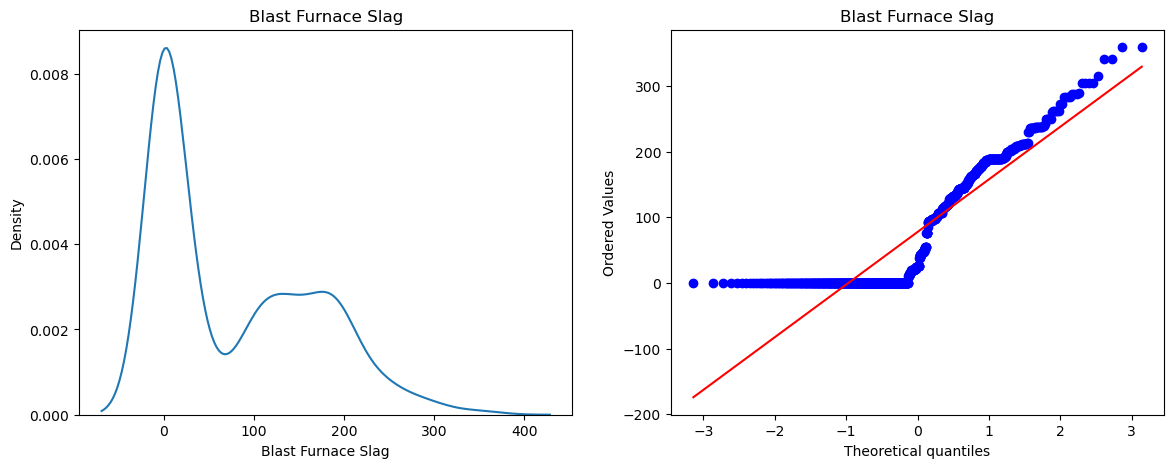

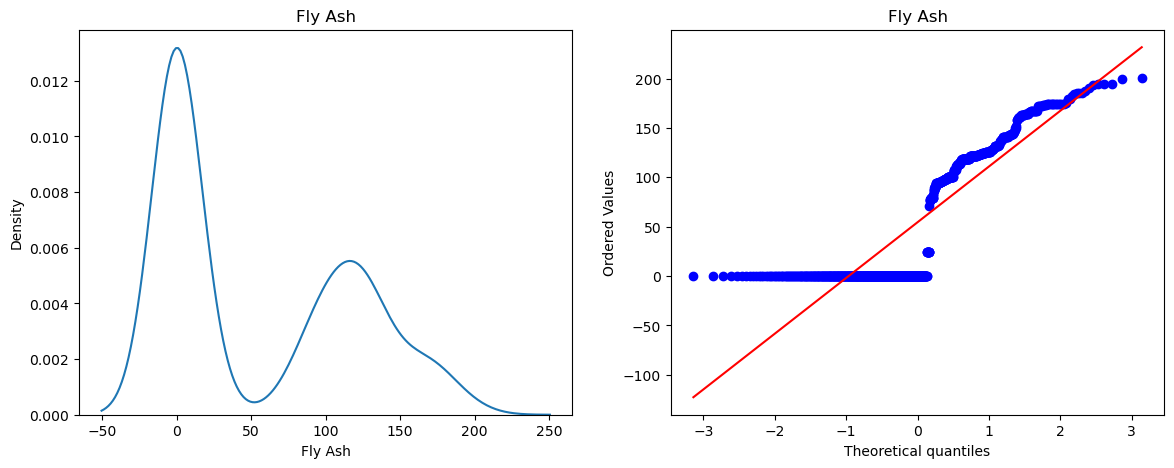

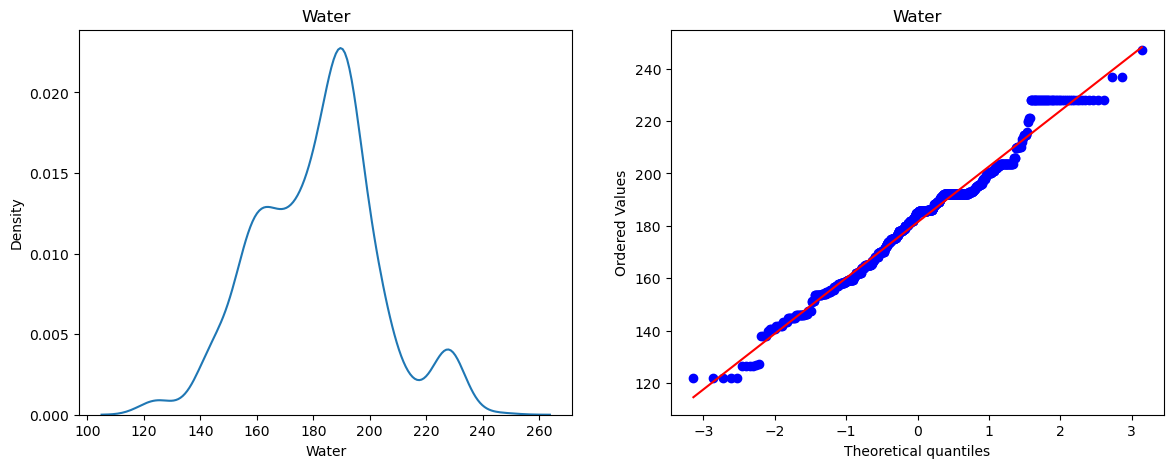

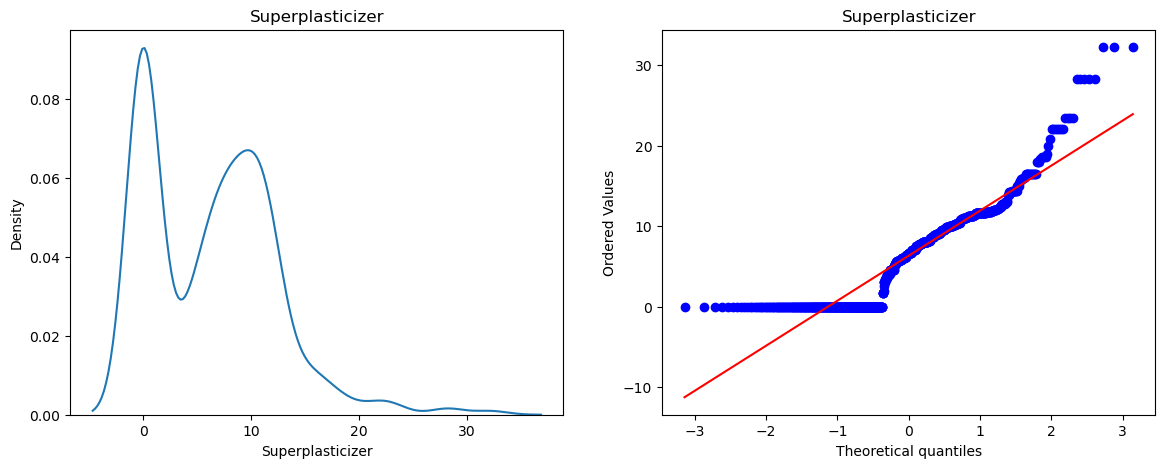

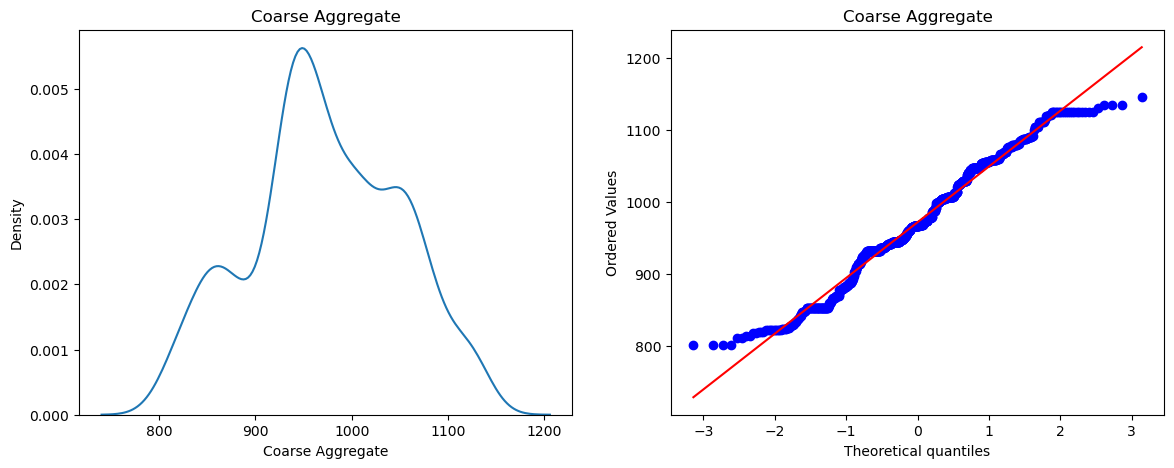

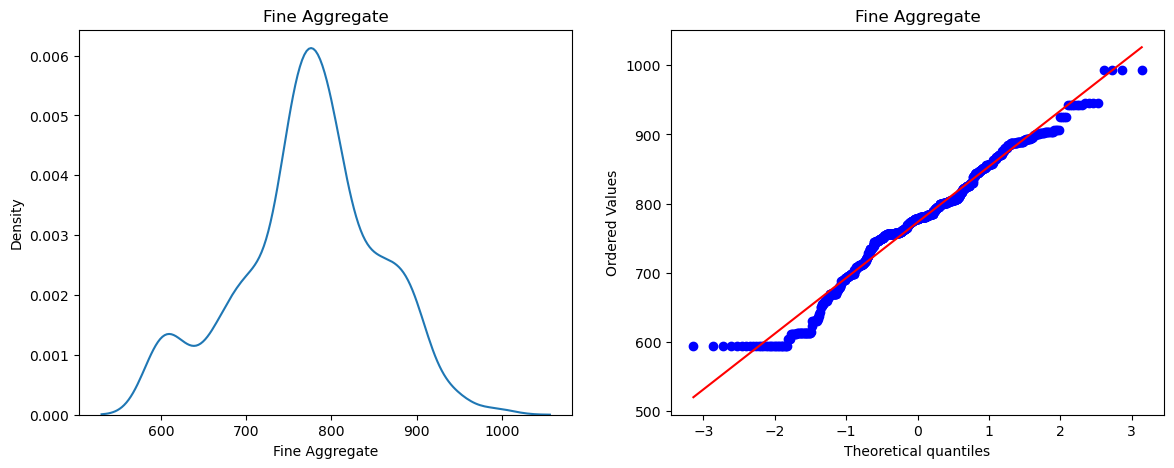

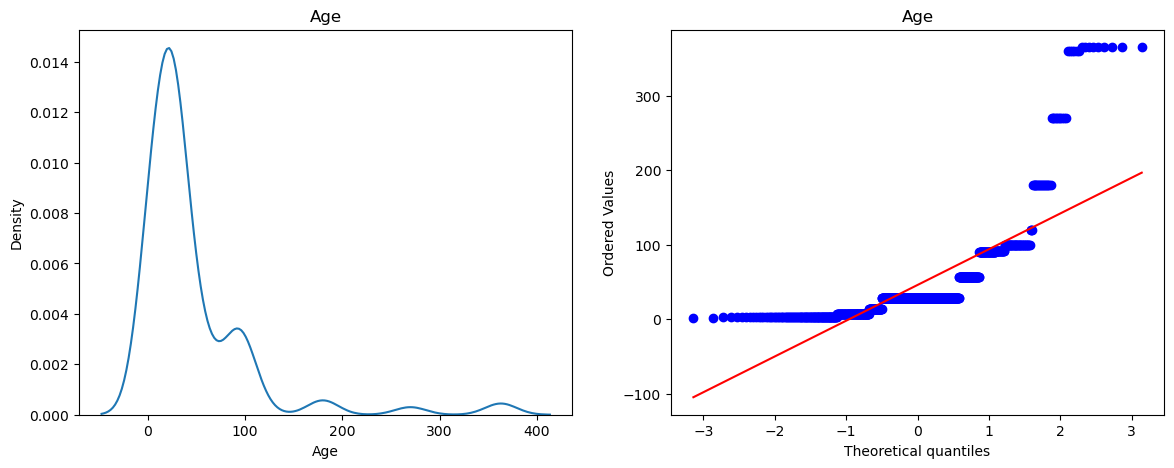

In [26]:
for col in x_train.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)

- now we will apply box cox tansformation

### Box Cox transformation

- so we have to pass method in the class

In [27]:
pw=PowerTransformer(method="box-cox")
x_train_transform=pw.fit_transform(x_train+0.00001)
x_test_transform=pw.transform(x_test+0.00001)

pd.DataFrame({"columns":x_train.columns,"lambda power":pw.lambdas_})

,columns,lambda power
0,Cement,0.153049
1,Blast Furnace Slag,0.034883
2,Fly Ash,-0.039014
3,Water,0.888072
4,Superplasticizer,0.125499
5,Coarse Aggregate,1.115681
6,Fine Aggregate,1.789591
7,Age,0.063010


In [28]:
lr=LinearRegression()
lr.fit(x_train_transform,y_train)

y_pred=lr.predict(x_test_transform)
r2_score(y_test,y_pred)

0.8140773785767036

- cross val score

In [99]:
box=PowerTransformer(method="box-cox")
x_transform=box.fit_transform(x+0.0001)

lr=LinearRegression()
np.mean(cross_val_score(lr,x_transform,y,cv=10,scoring="r2"))

np.float64(0.6482082289300525)

In [100]:
x_train_transform_df=pd.DataFrame(x_train_transform,columns=x_train.columns)

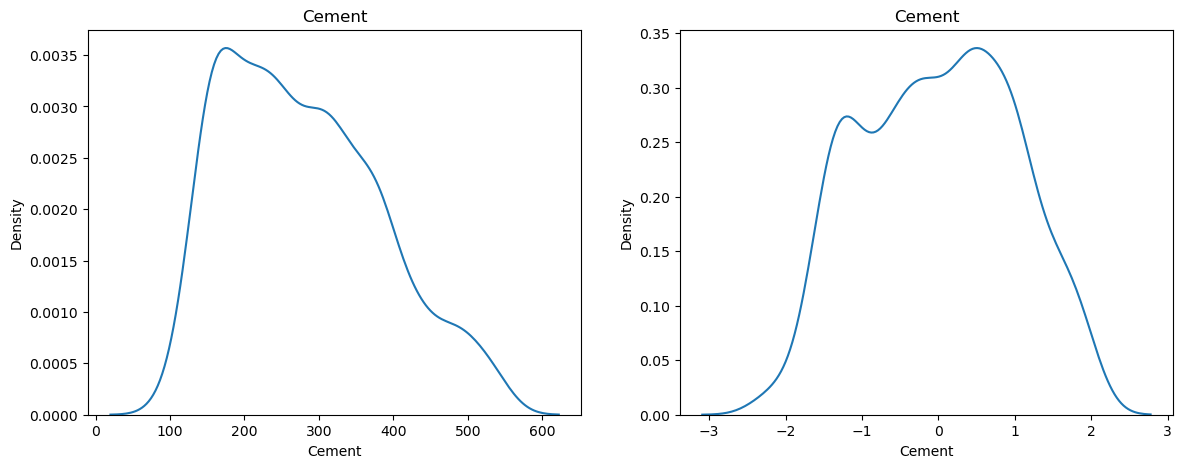

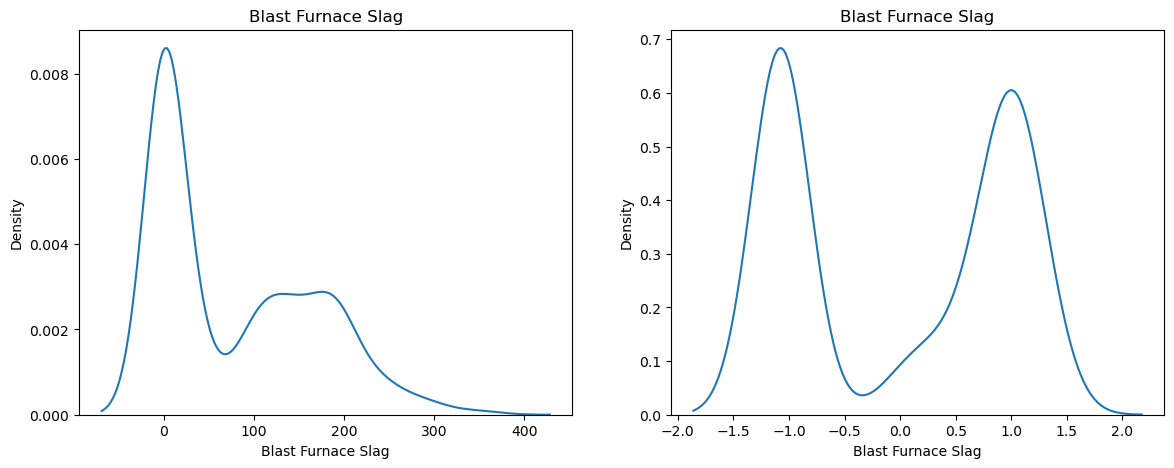

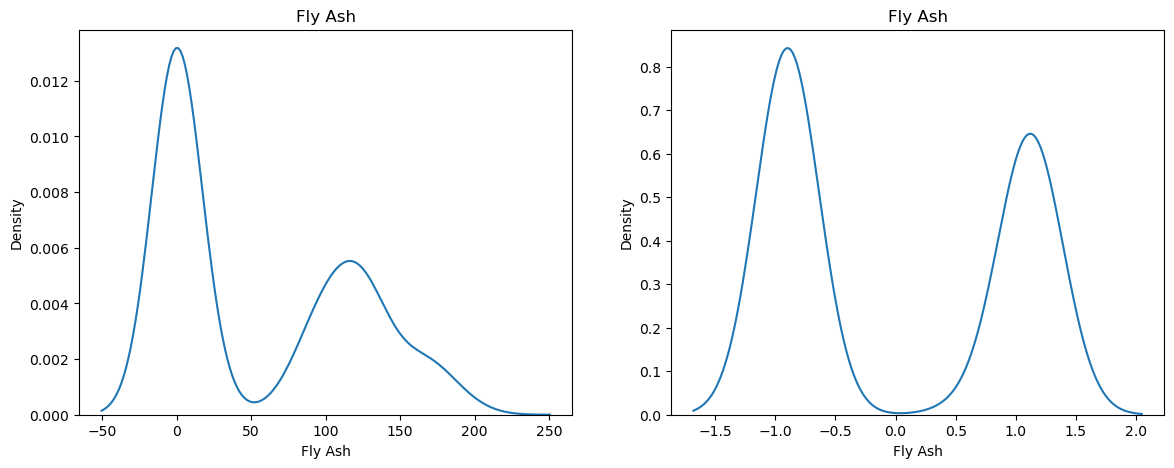

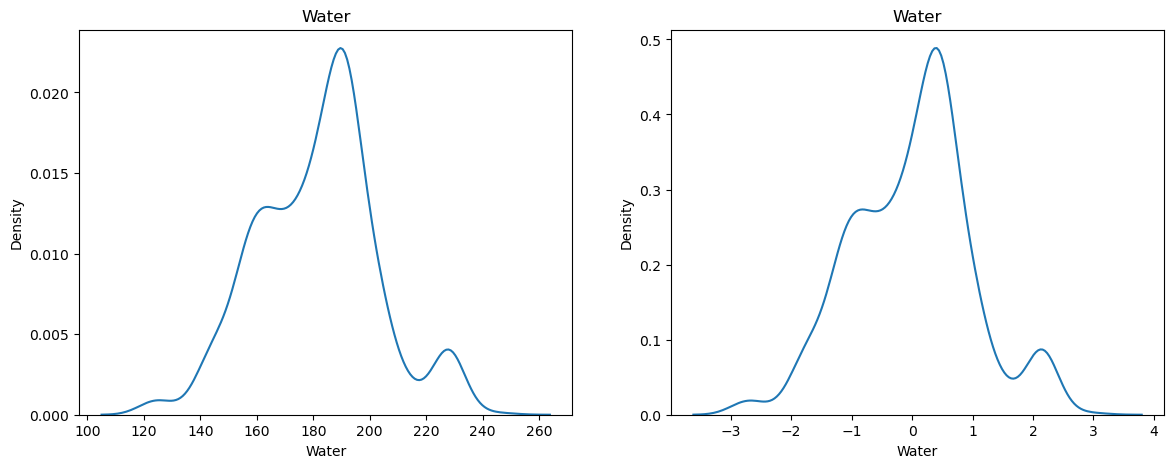

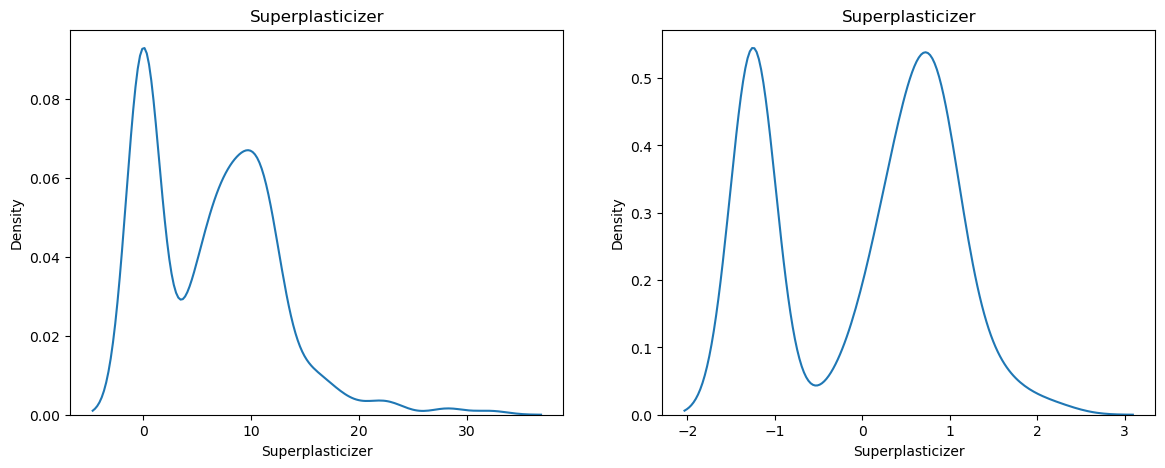

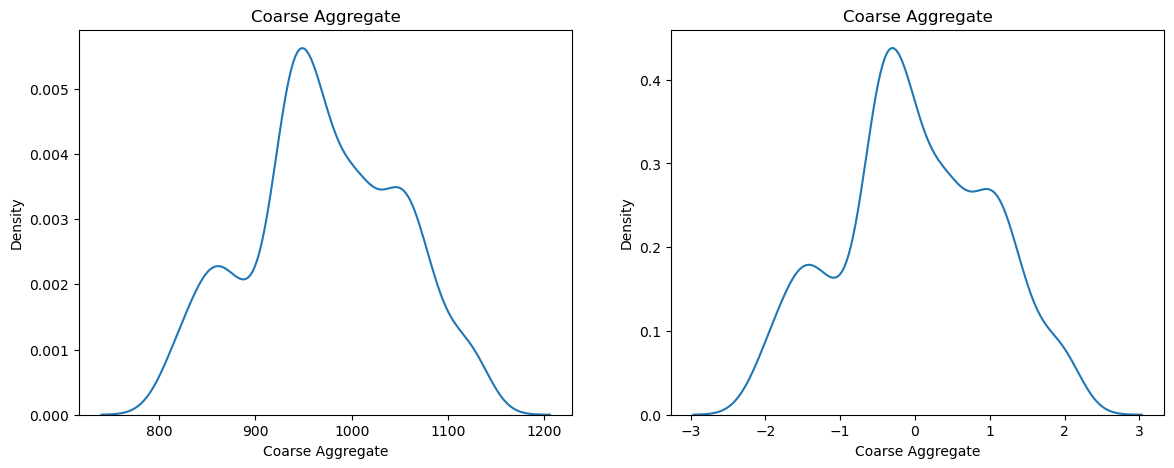

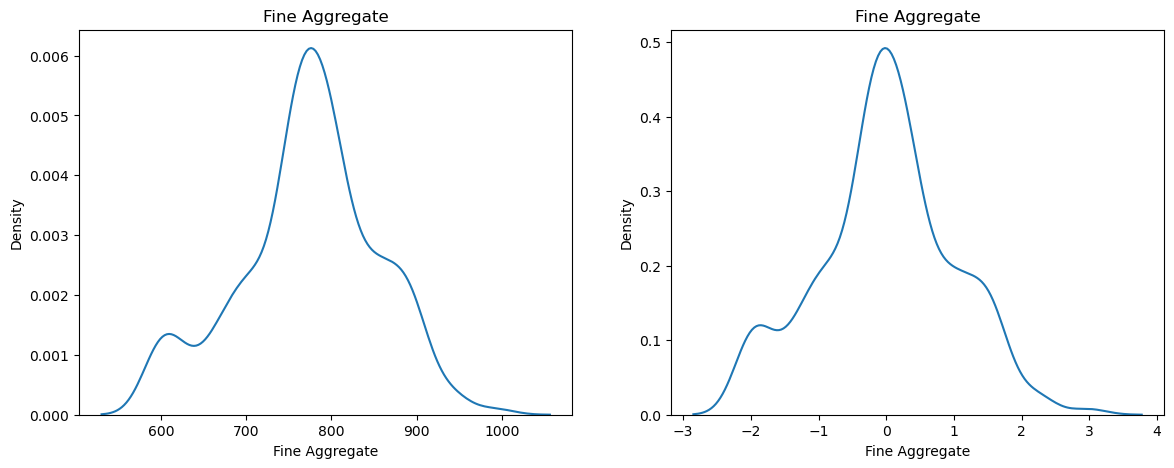

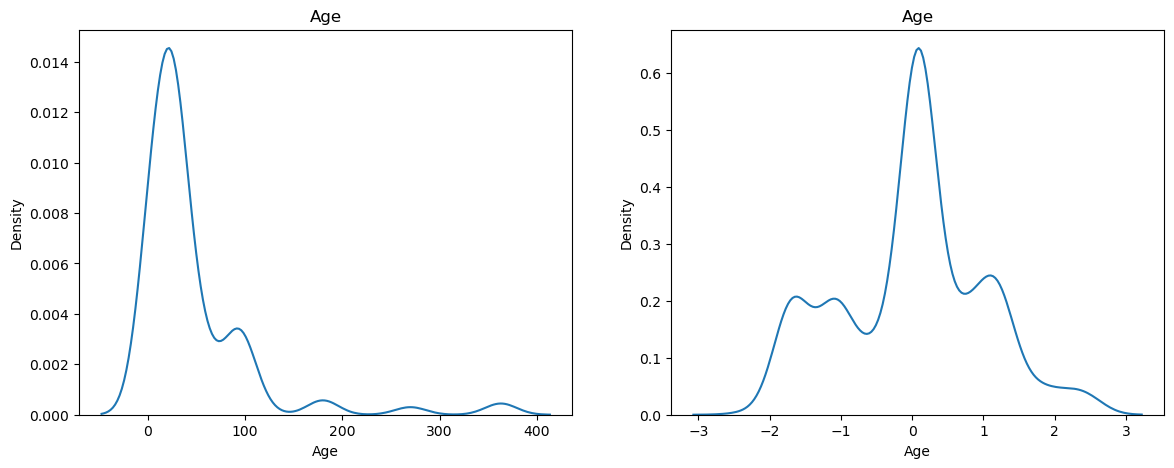

In [101]:
#before and after box-cox transform
for col in x_train_transform_df.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(x_train_transform_df[col])
    plt.title(col)

# yeo johnson

In [102]:
pt=PowerTransformer()

x_train_transform=pt.fit_transform(x_train+0.0001)
x_test_transform=pt.transform(x_test+0.0001)

In [103]:
lr=LinearRegression()
lr.fit(x_train_transform,y_train)

y_pred=lr.predict(x_test_transform)
print("linear",(r2_score(y_pred,y_test)))

linear 0.8073529631538093


- cross val score

In [105]:
lr=LinearRegression()
pt=PowerTransformer()
x_transform=pt.fit_transform(x+0.0001)
print("linear yeo johnson",np.mean(cross_val_score(lr,x_transform,y,scoring="r2",cv=10)))

linear yeo johnson 0.6586552732169607


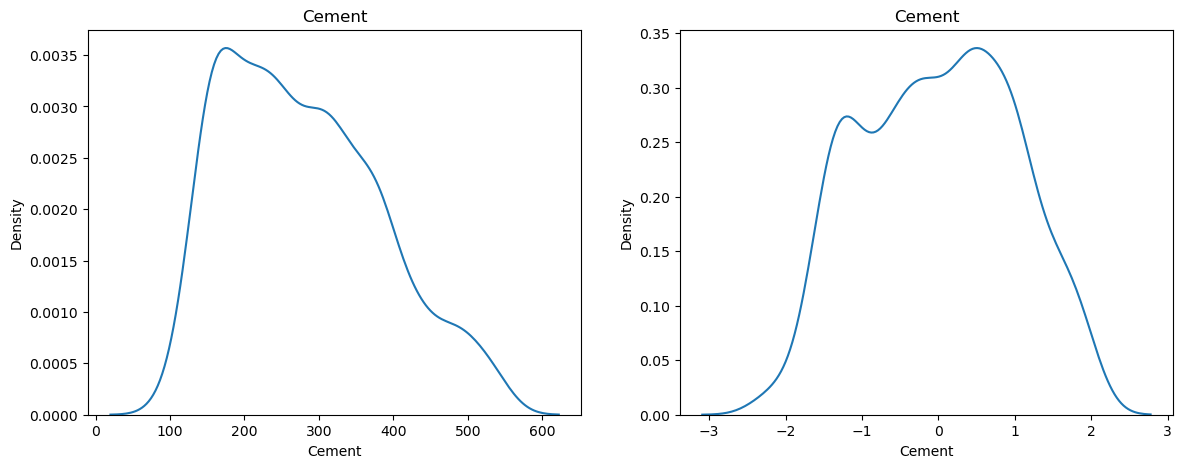

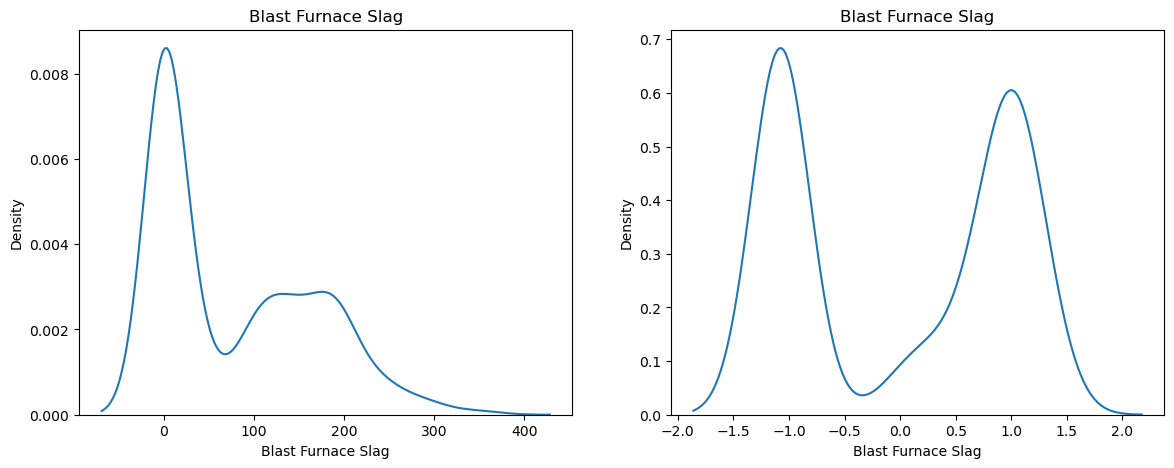

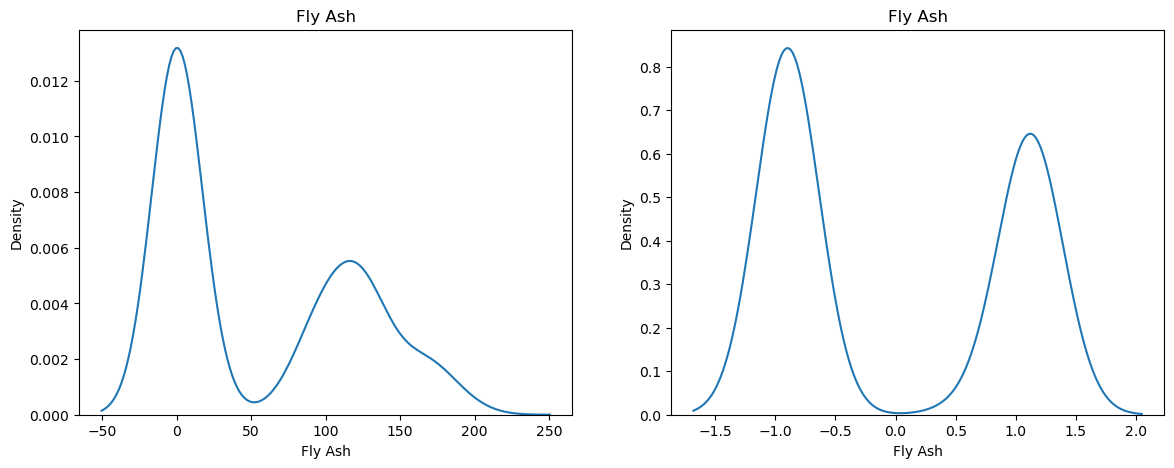

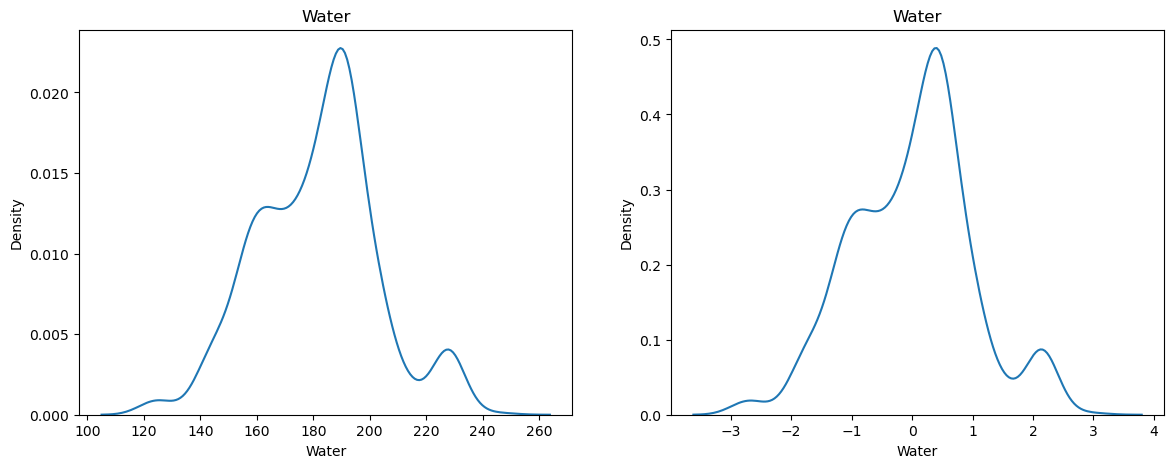

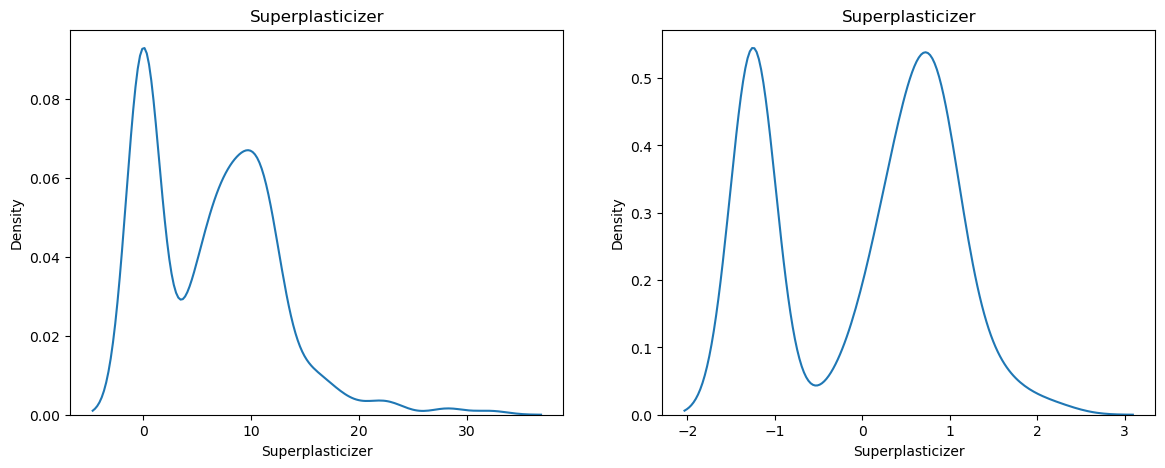

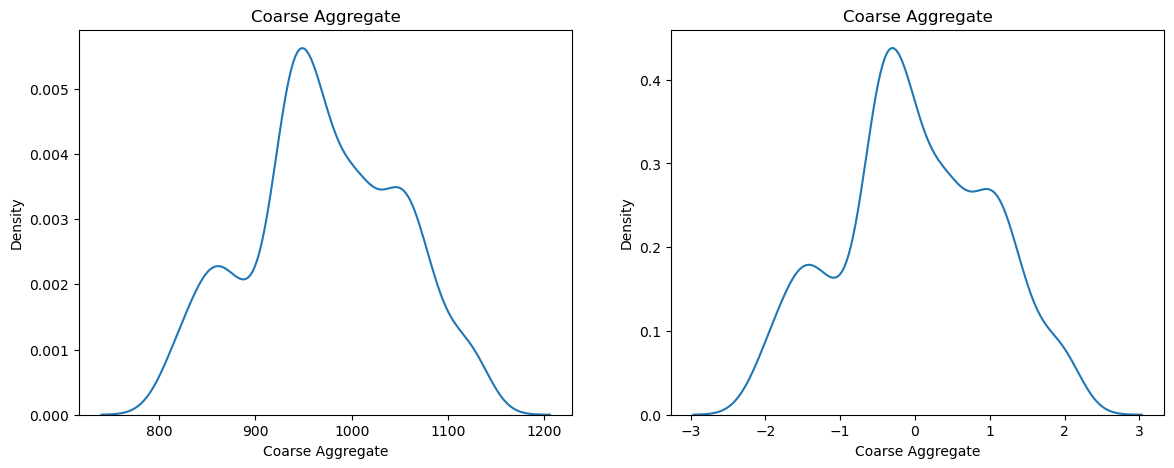

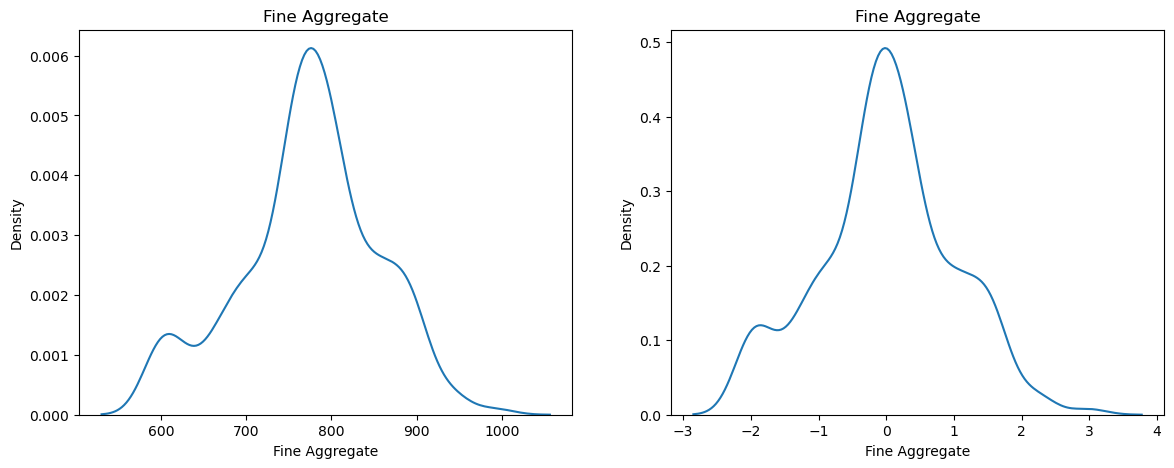

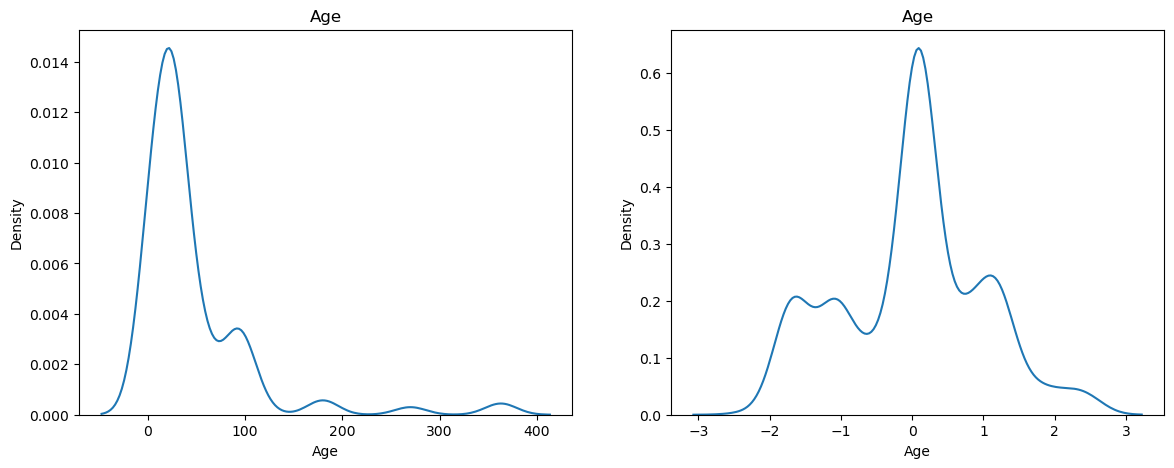

In [106]:
#before and after yeo johnson transformation
x_train_transform_df=pd.DataFrame(x_train_transform,columns=x_train.columns)

for col in x_train_transform_df.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(x_train_transform_df[col])
    plt.title(col)    

In [108]:
pd.DataFrame({"columns":x_train.columns,"box_cox":box.lambdas_,"yeo_johnson":pt.lambdas_})

,columns,box_cox,yeo_johnson
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.031303,0.016631
2,Fly Ash,-0.043311,-0.136483
3,Water,0.809568,0.808438
4,Superplasticizer,0.135340,0.264157
5,Coarse Aggregate,1.129167,1.129395
6,Fine Aggregate,1.829625,1.830764
7,Age,0.048970,0.001767
